# 1. Upload data

Upload data from `.xlsx` file using `pandas`

In [2]:
import pandas as pd
import os

current_dir = os.getcwd()

# Files should be located int the parent directory
file_path = os.path.join(current_dir, '..', "statistics.xlsx")
raw_df = pd.read_excel(file_path)

raw_df.head()

,Регіони та області,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Україна,26719,26782,31803,37080,47270,58442,69140,74688,90036
1,Автономна Республіка Крим,22793,…,…,…,…,…,…,…,…
2,Вінницька,23001,23422,29637,34931,45436,55734,65503,70939,86274
3,Волинська,19805,20137,24980,30013,38514,46120,53990,57973,70061
4,Дніпропетровська,30301,32036,39142,44366,57333,74755,89042,94804,113085


# 2. Finding statistical values

Using standart methods from `pandas` to calculate most of all statisticall values

In [3]:
# Exclude the row for 'України'
regions_df = raw_df[raw_df['Регіони та області'] != 'України']

# Select only numeric columns and convert them to numeric type
numeric_df = regions_df.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

statistics_df = pd.DataFrame({
    'mean': numeric_df.mean(),
    'median': numeric_df.median(),
    'mode': numeric_df.apply(lambda x: x.mode()[0] if len(x.mode()) == 1 else None),
    'std_dev': numeric_df.std(),
    'variance': numeric_df.var()
})

statistics_df

,mean,median,mode,std_dev,variance
2013,24880.464286,23348.5,None,6890.397056,4.747757e+07
2014,24851.538462,23257.5,None,8506.480674,7.236021e+07
2015,30260.192308,28866.0,None,10594.586603,1.122453e+08
2016,35525.807692,33813.0,None,13229.936822,1.750312e+08
2017,45327.961538,43161.0,None,17079.870588,2.917220e+08
2018,55539.269231,51964.0,None,20887.641398,4.362936e+08
2019,65337.730769,61271.5,None,25518.680870,6.512031e+08
2020,70752.461538,66233.0,None,26597.268320,7.074147e+08
2021,85109.192308,79474.5,None,33182.183005,1.101057e+09


# 3. Visualize raw data with histograms

[Change dataframe indexes](#5-data-cleaning) for better readability

In [10]:
# reset index and drop old index
df = raw_df.reset_index(drop=True)

# Sets the desired column 'Регіони та області' as the index (inplace modification)
df.set_index('Регіони та області', inplace=True)

df


,2013,2014,2015,2016,2017,2018,2019,2020,2021
Регіони та області,,,,,,,,,
Україна,26719,26782,31803,37080,47270,58442,69140,74688,90036
Автономна Республіка Крим,22793,…,…,…,…,…,…,…,…
Вінницька,23001,23422,29637,34931,45436,55734,65503,70939,86274
Волинська,19805,20137,24980,30013,38514,46120,53990,57973,70061
Дніпропетровська,30301,32036,39142,44366,57333,74755,89042,94804,113085
Донецька,31049,26234,21346,20927,25278,33840,39843,42219,49217
Житомирська,21652,22102,27801,32979,42684,52715,62571,66651,79328
Закарпатська,17929,17358,22457,26856,33891,41418,47852,52379,60386
Запорізька,28388,30182,36277,43462,54261,65065,76062,83309,97924


[Replace empty data](#5-data-cleaning) with `None` values

In [11]:
df = df.apply(pd.to_numeric, errors='coerce')

df

,2013,2014,2015,2016,2017,2018,2019,2020,2021
Регіони та області,,,,,,,,,
Україна,26719,26782.0,31803.0,37080.0,47270.0,58442.0,69140.0,74688.0,90036.0
Автономна Республіка Крим,22793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Вінницька,23001,23422.0,29637.0,34931.0,45436.0,55734.0,65503.0,70939.0,86274.0
Волинська,19805,20137.0,24980.0,30013.0,38514.0,46120.0,53990.0,57973.0,70061.0
Дніпропетровська,30301,32036.0,39142.0,44366.0,57333.0,74755.0,89042.0,94804.0,113085.0
Донецька,31049,26234.0,21346.0,20927.0,25278.0,33840.0,39843.0,42219.0,49217.0
Житомирська,21652,22102.0,27801.0,32979.0,42684.0,52715.0,62571.0,66651.0,79328.0
Закарпатська,17929,17358.0,22457.0,26856.0,33891.0,41418.0,47852.0,52379.0,60386.0
Запорізька,28388,30182.0,36277.0,43462.0,54261.0,65065.0,76062.0,83309.0,97924.0


In [12]:
import matplotlib.pyplot as plt

def plot_year(year: int) -> None:
    plt.figure(figsize=(10, 6))
    df[year].plot(kind='bar', edgecolor='black', color='orange')
    plt.title(f'Disposable Income per Capita (Excluding Temporarily Occupied Territories) in {year}')
    plt.xlabel('Regions')
    plt.ylabel('Value (UAH)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

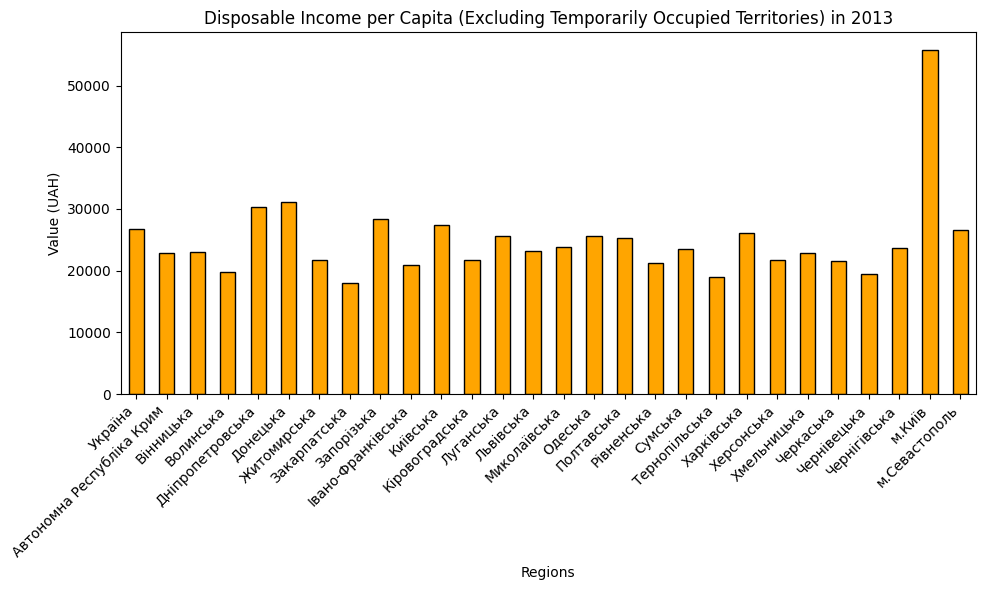

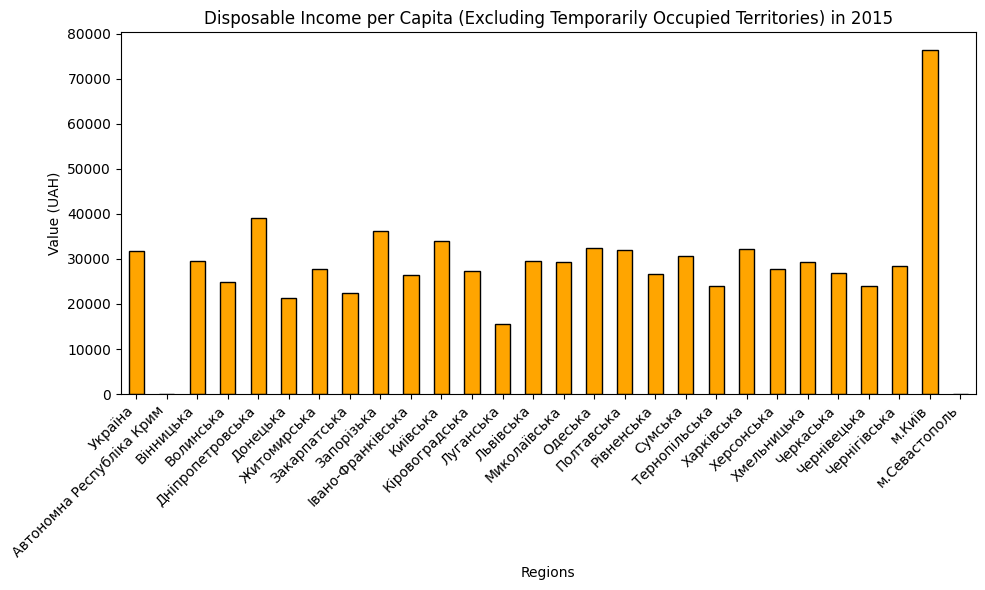

In [13]:
# Available years from 2013 till 2021
plot_year(2013)
plot_year(2015)

# 4. Actions with DataFrame and Series collection

## Series

1. Створення колекціх Series з базовими індексами

In [14]:
series = pd.Series(raw_df[2013])
series.head()

0    26719
1    22793
2    23001
3    19805
4    30301
Name: 2013, dtype: int64

2. Звернення до елементів Series

In [435]:
series[0]

26719

In [421]:
# works only if indexes are not standart
series['Україна']

KeyError: 'Україна'

3. Обчислення описових статистик для Series

In [18]:
series.describe()

count       28.000000
mean     24880.464286
std       6890.397056
min      17929.000000
25%      21647.250000
50%      23348.500000
75%      26219.500000
max      55842.000000
Name: 2013, dtype: float64

4. Створення колекції Series з нестандартними індексами

In [19]:
data = {"Україна": 26719, "Київ": 55842}
new_series = pd.Series(data)
new_series

Україна    26719
Київ       55842
dtype: int64

5. Звернення до елементів Series з використанням нестандартних індексів

In [20]:
new_series["Київ"]

55842

In [21]:
new_series[1]

C:\Users\local_gud2i5y\AppData\Local\Temp\ipykernel_2936\837352922.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new_series[1]


55842

## DataFrame

1. Звернення до стовпців DataFrame

In [22]:
df_2021 = raw_df[2021]
df_2021.head()

0     90036
1         …
2     86274
3     70061
4    113085
Name: 2021, dtype: object

2. Вибір рядків з використанням атрибутів `loc` і `iloc`

In [23]:
df_2013_first_region = raw_df.iloc[0, 1]
df_2013_first_region

26719

In [24]:
df_two_regions = raw_df.iloc[[0, 1]]
df_two_regions

,Регіони та області,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Україна,26719,26782,31803,37080,47270,58442,69140,74688,90036
1,Автономна Республіка Крим,22793,…,…,…,…,…,…,…,…


In [25]:
df_2015_ukraine = raw_df.loc[raw_df['Регіони та області'] == 'Україна', 2015]
df_2015_ukraine

0    31803
Name: 2015, dtype: object

In [28]:
df_all_years_five_regions = raw_df.iloc[1:5]
df_all_years_five_regions

,Регіони та області,2013,2014,2015,2016,2017,2018,2019,2020,2021
1,Автономна Республіка Крим,22793,…,…,…,…,…,…,…,…
2,Вінницька,23001,23422,29637,34931,45436,55734,65503,70939,86274
3,Волинська,19805,20137,24980,30013,38514,46120,53990,57973,70061
4,Дніпропетровська,30301,32036,39142,44366,57333,74755,89042,94804,113085


3. Вибір підмножин рядків і стовпців

In [30]:
df_compare_two_regions_four_years = raw_df.iloc[[20, 26], :5]
df_compare_two_regions_four_years


,Регіони та області,2013,2014,2015,2016
20,Харківська,26098,26274,32198,38197
26,м.Київ,55842,62715,76514,92254


4. Логічне індексування

In [32]:
# Consider using df to avoid 'str to int' errors
df_last_three_years = df.loc[:, 2019:2021]
df_last_three_years.head()

,2019,2020,2021
Регіони та області,,,
Україна,69140.0,74688.0,90036.0
Автономна Республіка Крим,NaN,NaN,NaN
Вінницька,65503.0,70939.0,86274.0
Волинська,53990.0,57973.0,70061.0
Дніпропетровська,89042.0,94804.0,113085.0


In [36]:
df_rich_regions_last_three_years = df_last_three_years[df_last_three_years >= 80000]
df_rich_regions_last_three_years.head()

,2019,2020,2021
Регіони та області,,,
Україна,NaN,NaN,90036.0
Автономна Республіка Крим,NaN,NaN,NaN
Вінницька,NaN,NaN,86274.0
Волинська,NaN,NaN,NaN
Дніпропетровська,89042.0,94804.0,113085.0


5. Звернення до конкретного осередку DataFrame по рядку і стовпцю

In [37]:
value = raw_df.at[0, 2021]
value


90036

In [38]:
raw_df.at[0, 2021] = 102003
raw_df.head()

,Регіони та області,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Україна,26719,26782,31803,37080,47270,58442,69140,74688,102003
1,Автономна Республіка Крим,22793,…,…,…,…,…,…,…,…
2,Вінницька,23001,23422,29637,34931,45436,55734,65503,70939,86274
3,Волинська,19805,20137,24980,30013,38514,46120,53990,57973,70061
4,Дніпропетровська,30301,32036,39142,44366,57333,74755,89042,94804,113085


In [441]:
raw_df.at[0, 2021] = 90036
raw_df.head()

,Регіони та області,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Україна,26719,26782,31803,37080,47270,58442,69140,74688,90036
1,Автономна Республіка Крим,22793,…,…,…,…,…,…,…,…
2,Вінницька,23001,23422,29637,34931,45436,55734,65503,70939,86274
3,Волинська,19805,20137,24980,30013,38514,46120,53990,57973,70061
4,Дніпропетровська,30301,32036,39142,44366,57333,74755,89042,94804,113085


6. Описова статистика

In [39]:
raw_df.describe()

,2013
count,28.000000
mean,24880.464286
std,6890.397056
min,17929.000000
25%,21647.250000
50%,23348.500000
75%,26219.500000
max,55842.000000


In [469]:
df.describe()

,2013,2014,2015,2016,2017,2018,2019,2020,2021
count,28.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,24880.464286,24851.538462,30260.192308,35525.807692,45327.961538,55539.269231,65337.730769,70752.461538,85109.192308
std,6890.397056,8506.480674,10594.586603,13229.936822,17079.870588,20887.641398,25518.680870,26597.268320,33182.183005
min,17929.000000,17358.000000,15634.000000,13793.000000,16416.000000,21252.000000,24975.000000,27274.000000,32223.000000
25%,21647.250000,20986.250000,26582.000000,31401.000000,40388.750000,48319.000000,56066.250000,59784.500000,71105.500000
50%,23348.500000,23257.500000,28866.000000,33813.000000,43161.000000,51964.000000,61271.500000,66233.000000,79474.500000
75%,26219.500000,26224.500000,31948.500000,37723.500000,48095.000000,57979.500000,68693.250000,75614.250000,92068.500000
max,55842.000000,62715.000000,76514.000000,92254.000000,118208.000000,143676.000000,173677.000000,182547.000000,225321.000000


7. Транспонування DataFrame з використанням атрибута T

In [446]:
raw_df.T

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
Регіони та області,Україна,Автономна Республіка Крим,Вінницька,Волинська,Дніпропетровська,Донецька,Житомирська,Закарпатська,Запорізька,Івано-Франківська,...,Сумська,Тернопільська,Харківська,Херсонська,Хмельницька,Черкаська,Чернівецька,Чернігівська,м.Київ,м.Севастополь
2013,26719,22793,23001,19805,30301,31049,21652,17929,28388,20988,...,23559,18994,26098,21724,22789,21633,19438,23600,55842,26584
2014,26782,…,23422,20137,32036,26234,22102,17358,30182,20357,...,23938,18401,26274,20728,22686,21761,18476,23093,62715,…
2015,31803,…,29637,24980,39142,21346,27801,22457,36277,26540,...,30572,24040,32198,27880,29292,26970,23929,28440,76514,…
2016,37080,…,34931,30013,44366,20927,32979,26856,43462,31719,...,36084,28195,38197,32968,34395,32327,28361,33231,92254,…
2017,47270,…,45436,38514,57333,25278,42684,33891,54261,40580,...,45852,36204,48370,41695,43638,41854,36215,42501,118208,…
2018,58442,…,55734,46120,74755,33840,52715,41418,65065,48724,...,55829,43577,56421,50195,50640,50600,42762,51213,143676,…
2019,69140,…,65503,53990,89042,39843,62571,47852,76062,56514,...,65932,50536,66547,58129,58934,59626,49142,59972,173677,…
2020,74688,…,70939,57973,94804,42219,66651,52379,83309,61088,...,71955,55776,75923,63853,65411,64852,54178,65815,182547,…
2021,90036,…,86274,70061,113085,49217,79328,60386,97924,71944,...,87410,67467,92746,76532,78500,79621,64130,76777,225321,…


8. Сортування рядків за індексами

In [7]:
raw_df.sort_index(ascending=False).head()

,Регіони та області,2013,2014,2015,2016,2017,2018,2019,2020,2021
27,м.Севастополь,26584,…,…,…,…,…,…,…,…
26,м.Київ,55842,62715,76514,92254,118208,143676,173677,182547,225321
25,Чернігівська,23600,23093,28440,33231,42501,51213,59972,65815,76777
24,Чернівецька,19438,18476,23929,28361,36215,42762,49142,54178,64130
23,Черкаська,21633,21761,26970,32327,41854,50600,59626,64852,79621


# 5. Data cleaning

1. Set the desired column 'Регіони та області' as the index

In [3]:
# reset index and drop old index
df = raw_df.reset_index(drop=True)

# Sets the desired column as the index (inplace modification)
df.set_index('Регіони та області', inplace=True)

df.head()

,2013,2014,2015,2016,2017,2018,2019,2020,2021
Регіони та області,,,,,,,,,
Україна,26719,26782,31803,37080,47270,58442,69140,74688,90036
Автономна Республіка Крим,22793,…,…,…,…,…,…,…,…
Вінницька,23001,23422,29637,34931,45436,55734,65503,70939,86274
Волинська,19805,20137,24980,30013,38514,46120,53990,57973,70061
Дніпропетровська,30301,32036,39142,44366,57333,74755,89042,94804,113085


2. Replace empty data with `None` values

In [4]:
df = df.apply(pd.to_numeric, errors='coerce')

df.head()

,2013,2014,2015,2016,2017,2018,2019,2020,2021
Регіони та області,,,,,,,,,
Україна,26719,26782.0,31803.0,37080.0,47270.0,58442.0,69140.0,74688.0,90036.0
Автономна Республіка Крим,22793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Вінницька,23001,23422.0,29637.0,34931.0,45436.0,55734.0,65503.0,70939.0,86274.0
Волинська,19805,20137.0,24980.0,30013.0,38514.0,46120.0,53990.0,57973.0,70061.0
Дніпропетровська,30301,32036.0,39142.0,44366.0,57333.0,74755.0,89042.0,94804.0,113085.0


3. Save processed dataframe to `.csv` file

In [480]:
df.to_csv("../processed-regions.csv", index=False)